In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_90m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_90m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_3_crimes_100m'

In [2]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Investigations Within 100m, Oct. 2022   
                                                 \emph{Independent Variable}                                                         
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_3_crimes_100m                                 2.754363e-81   
                                                 pre_treatment_change_in_group_3_crimes_100m                          1.315964e-01   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                   3.483081e-16   
                                                 job_density_2013                                                     6.259441e-11   
                                                 med_hhinc2016                                                        9.384918e-02   
                                                 poor_share2010                                                       2.592818e-01   
                                                 popdensity2010                                                       1.290828e-06   
                                                 rent_twobed2015                                                      6.987406e-09   
                                                 share_white2010                                                      3.400767e-05   
                                                 traveltime15_2010                                                    3.960019e-06   
Panel C: Case Initiation                         for_cause                                                            6.491698e-04   
                                                 no_cause                                                             6.002623e-02   
                                                 non_payment                                                          3.088787e-05   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                             9.379666e-01   
                                                 hasAttyP                                                             9.316866e-06   
                                                 isEntityD                                                            1.805978e-22   
                                                 isEntityP                                                            2.349147e-09   

                                                                                                                
                                                                                             Plaintiff Victory  
                                                 \emph{Independent Variable}                                    
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_3_crimes_100m             3.822818e-01  
                                                 pre_treatment_change_in_group_3_crimes_100m      8.145079e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                               2.403331e-01  
                                                 job_density_2013                                 1.626836e-01  
                                                 med_hhinc2016                                    1.910501e-01  
                                                 poor_share2010                                   1.428679e-01  
                                                 popdensity2010                                   5.946111e-02  
                                                 rent_twobed2015                                  5.003043e-01  
                                                 share_white2010                                  9.829904e-02  
                                                 traveltime15_2010         

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                             Cases Won by Plaintiff   
Panel A twenty_seventeen_group_3_crimes_100m               0.452256   
Panel B frac_coll_plus2010                                 0.322882   
        job_density_2013                               16069.137185   
        popdensity2010                                 23086.043553   
        rent_twobed2015                                 1339.985876   
        share_white2010                                    0.312272   
        traveltime15_2010                                  0.162315   
Panel C for_cause                                          0.165268   
        non_payment                                        0.781742   
Panel D hasAttyP                                           0.879853   
        isEntityD                                          0.014166   
        isEntityP                                          0.808499   

                                             Difference in Cases Won by Defendant  \
                                                                       Unweighted   
Panel A twenty_seventeen_group_3_crimes_100m                             0.039635   
Panel B frac_coll_plus2010                                               0.014179   
        job_density_2013                                              3197.929971   
        popdensity2010                                                1373.148087   
        rent_twobed2015                                                -29.551242   
        share_white2010                                                  0.024618   
        traveltime15_2010                                                0.005986   
Panel C for_cause                                                       -0.014344   
        non_payment                                                      0.068150   
Panel D hasAttyP                                                         0.071601   
        isEntityD                                                       -0.039232   
        isEntityP                                                        0.099762   

                                                                         \
                                                  \emph{p}     Weighted   
Panel A twenty_seventeen_group_3_crimes_100m  3.822818e-01     0.040655   
Panel B frac_coll_plus2010                    2.403331e-01     0.049610   
        job_density_2013                      1.626836e-01  5396.389148   
        popdensity2010                        5.946111e-02   491.105428   
        rent_twobed2015                       5.003043e-01    31.270307   
        share_white2010                       9.829904e-02     0.049384   
        traveltime15_2010                     2.271578e-01     0.010494   
Panel C for_cause                             4.801045e-01    -0.016651   
        non_payment                           2.880676e-03     0.099556   
Panel D hasAttyP                              1.016046e-04     0.106907   
        isEntityD                             4.881644e-07     0.012326   
        isEntityP                             6.134468e-06     0.115667   

                                                        
                                              \emph{p}  
Panel A twenty_seventeen_group_3_crimes_100m  0.575804  
Panel B frac_coll_plus2010                    0.008328  
        job_density_2013                      0.157045  
        popdensity2010                        0.678998  
        rent_twobed2015                       0.667904  
        share_white2010                       0.037825  
        traveltime15_2010                     0.201152  
Panel C for_cause                             0.599779  
        non_payment                           0.005561  
Panel D hasAttyP                              0.000352  
        isEntityD                             0.167148  
        isEntityP                             0.000872

In [5]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:13<00:00, 156.89it/s]


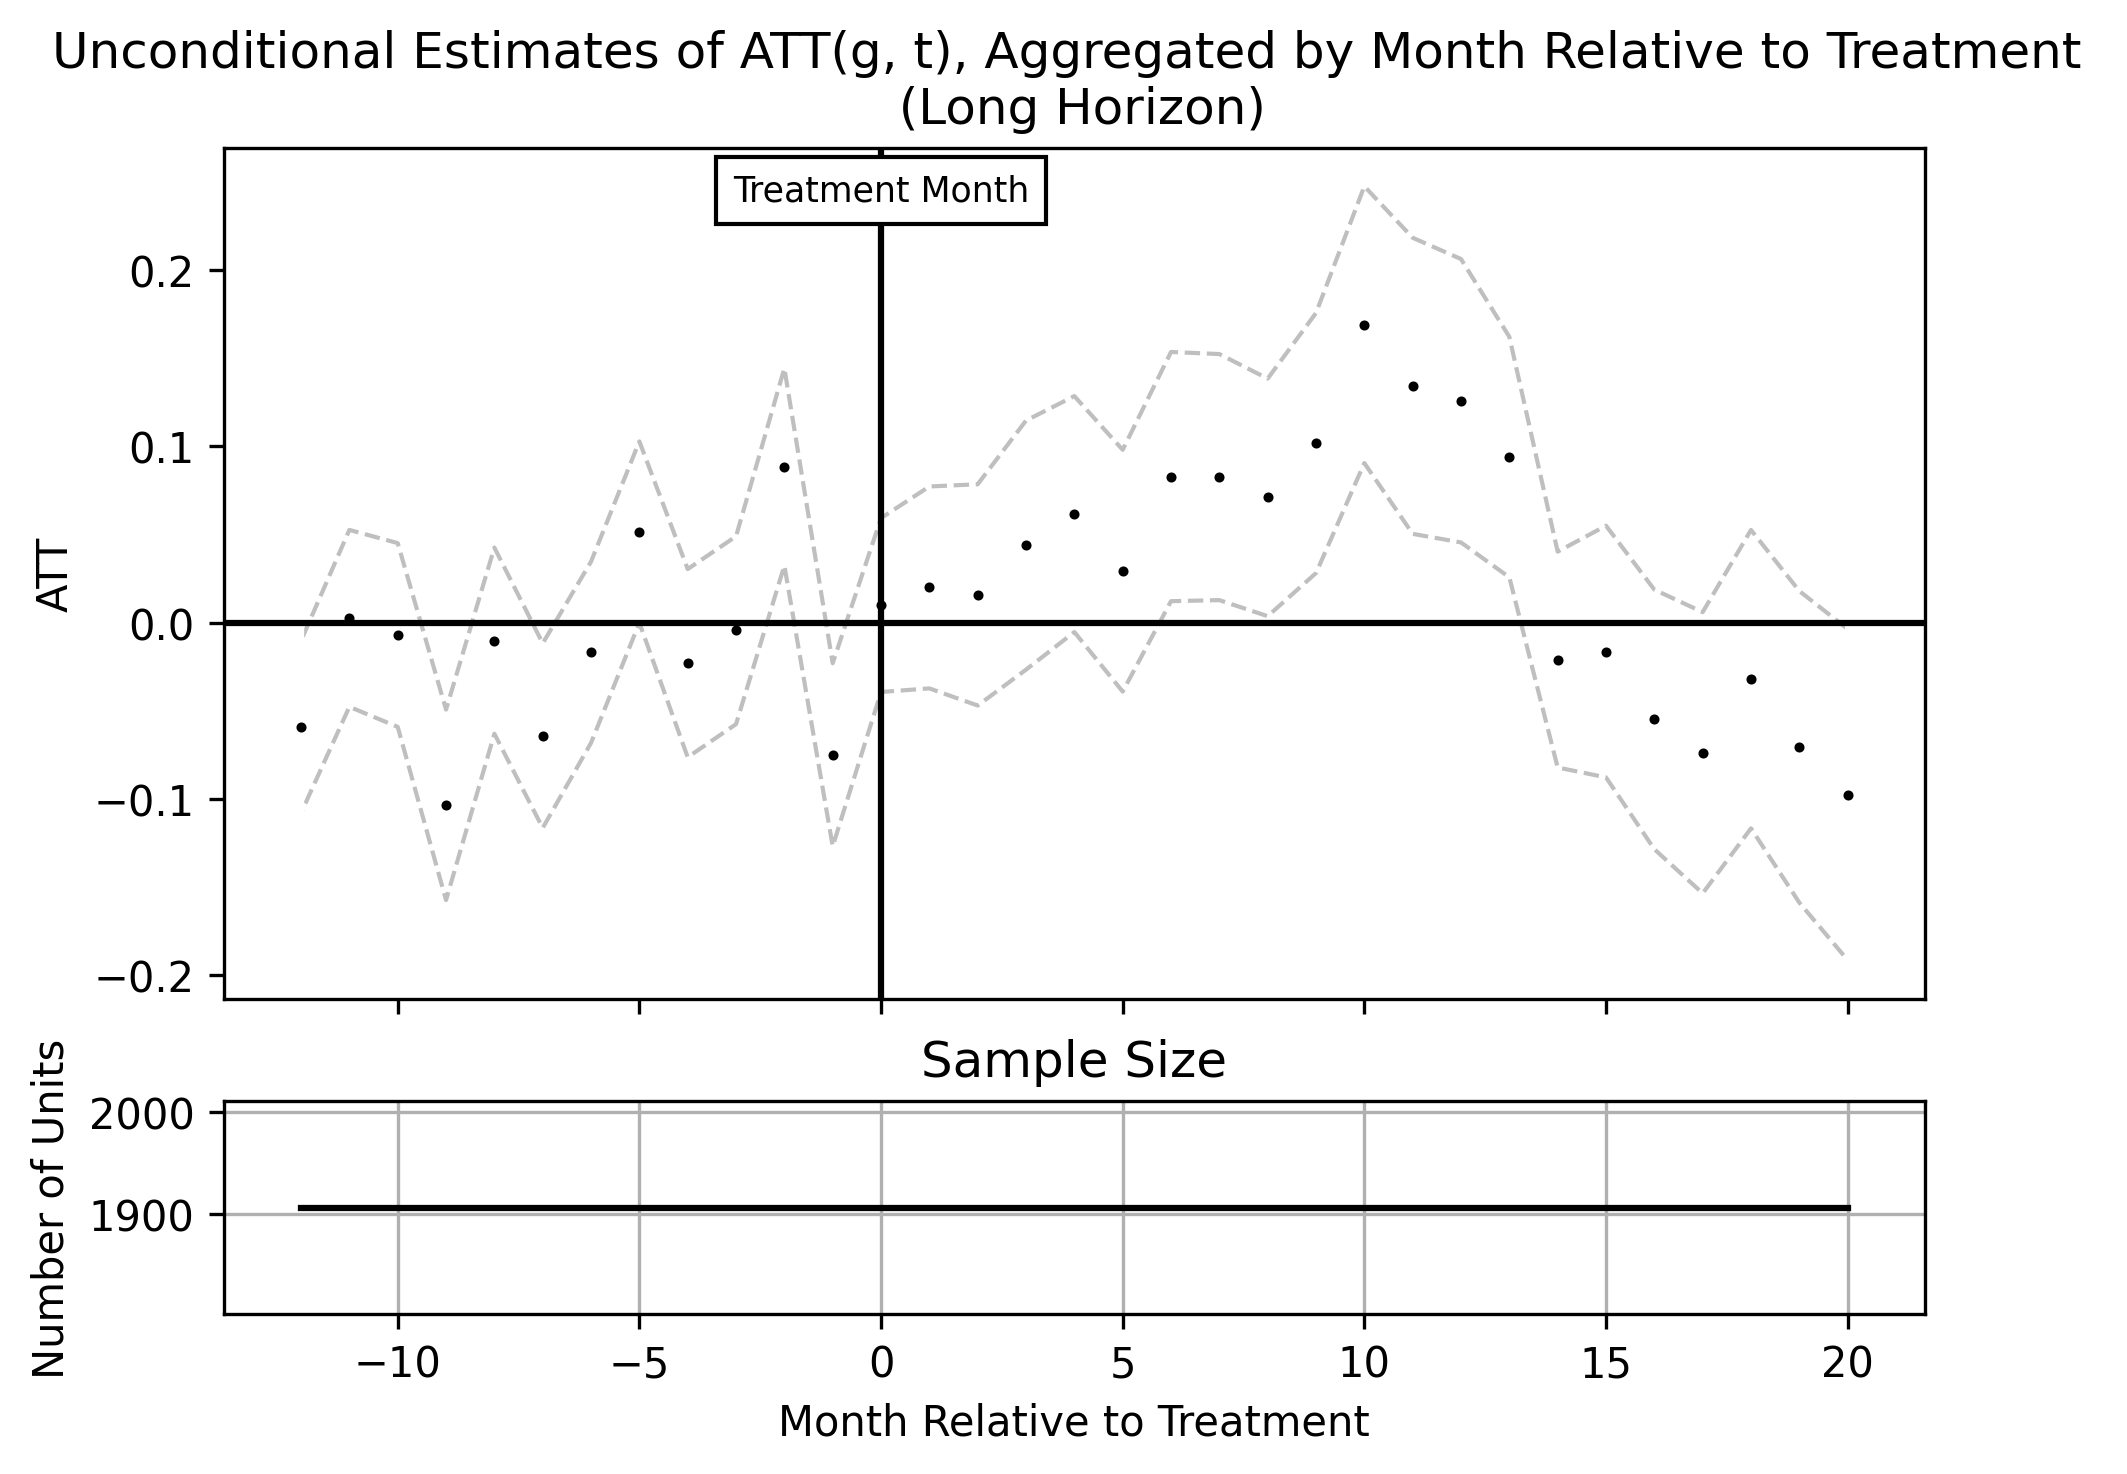

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

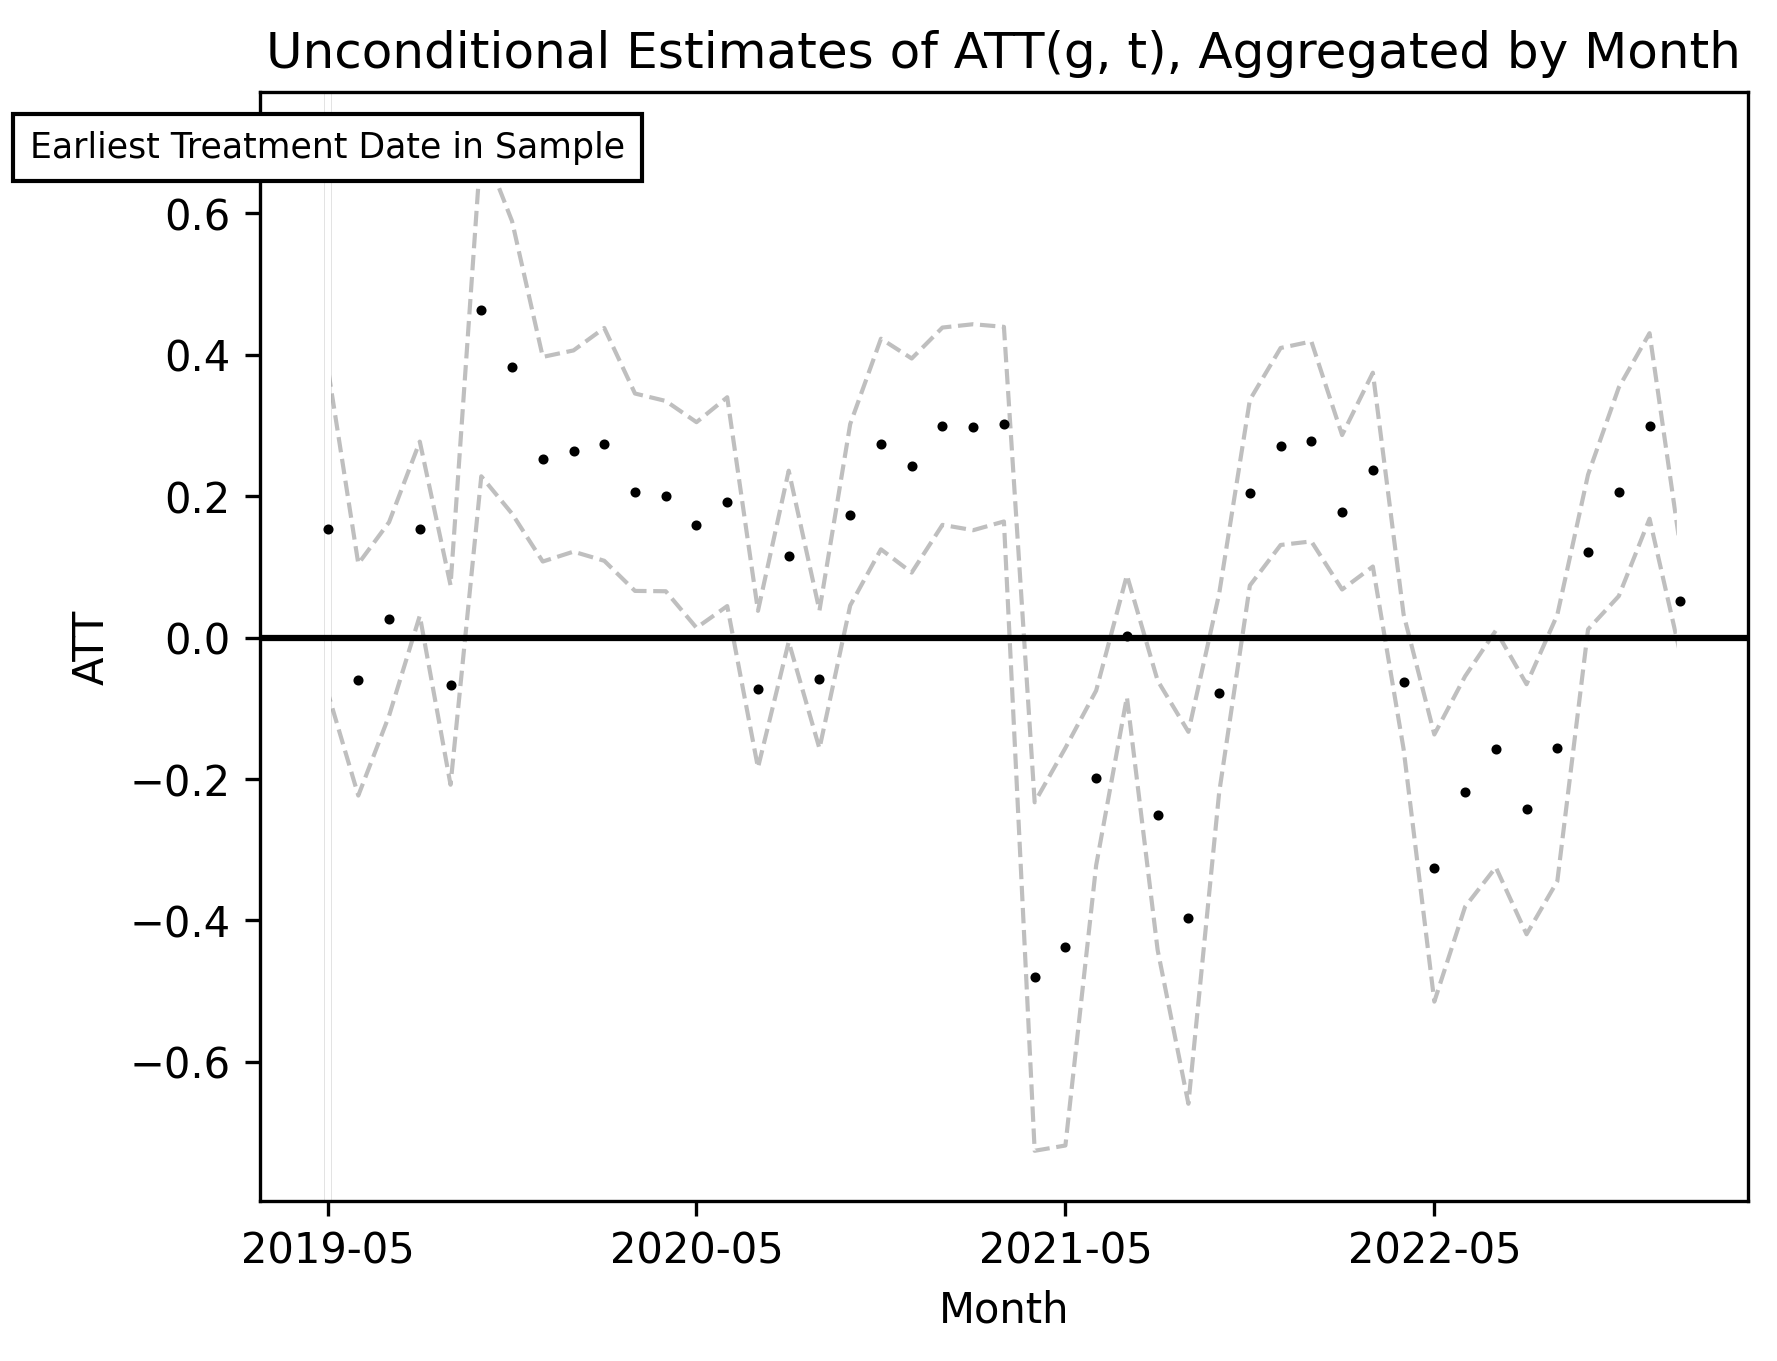

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [ ]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

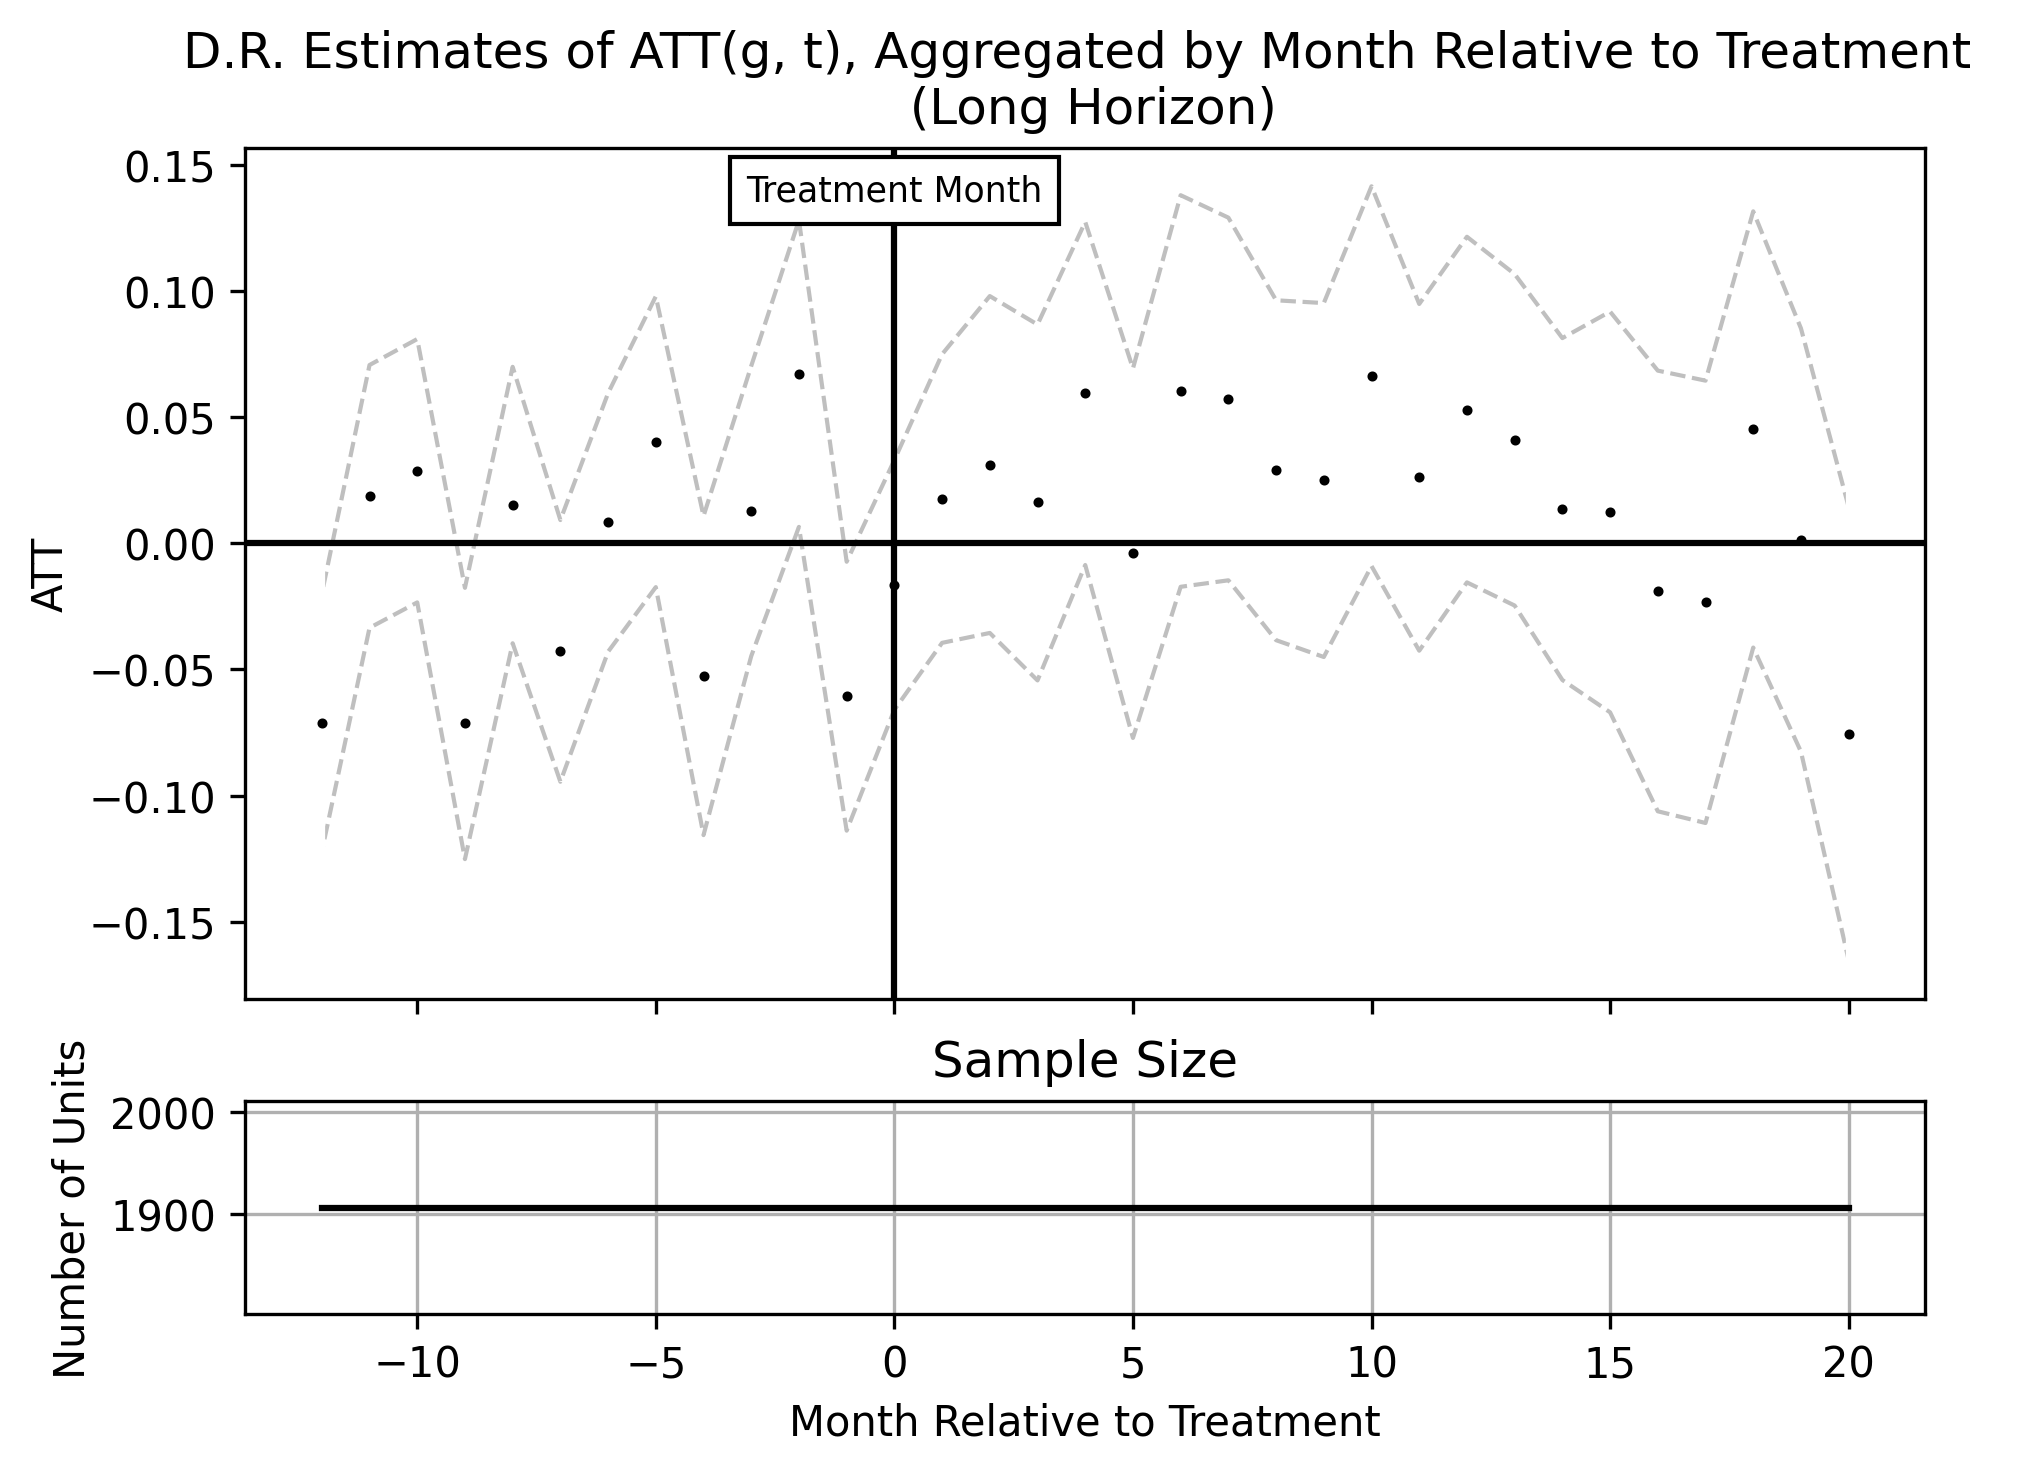

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

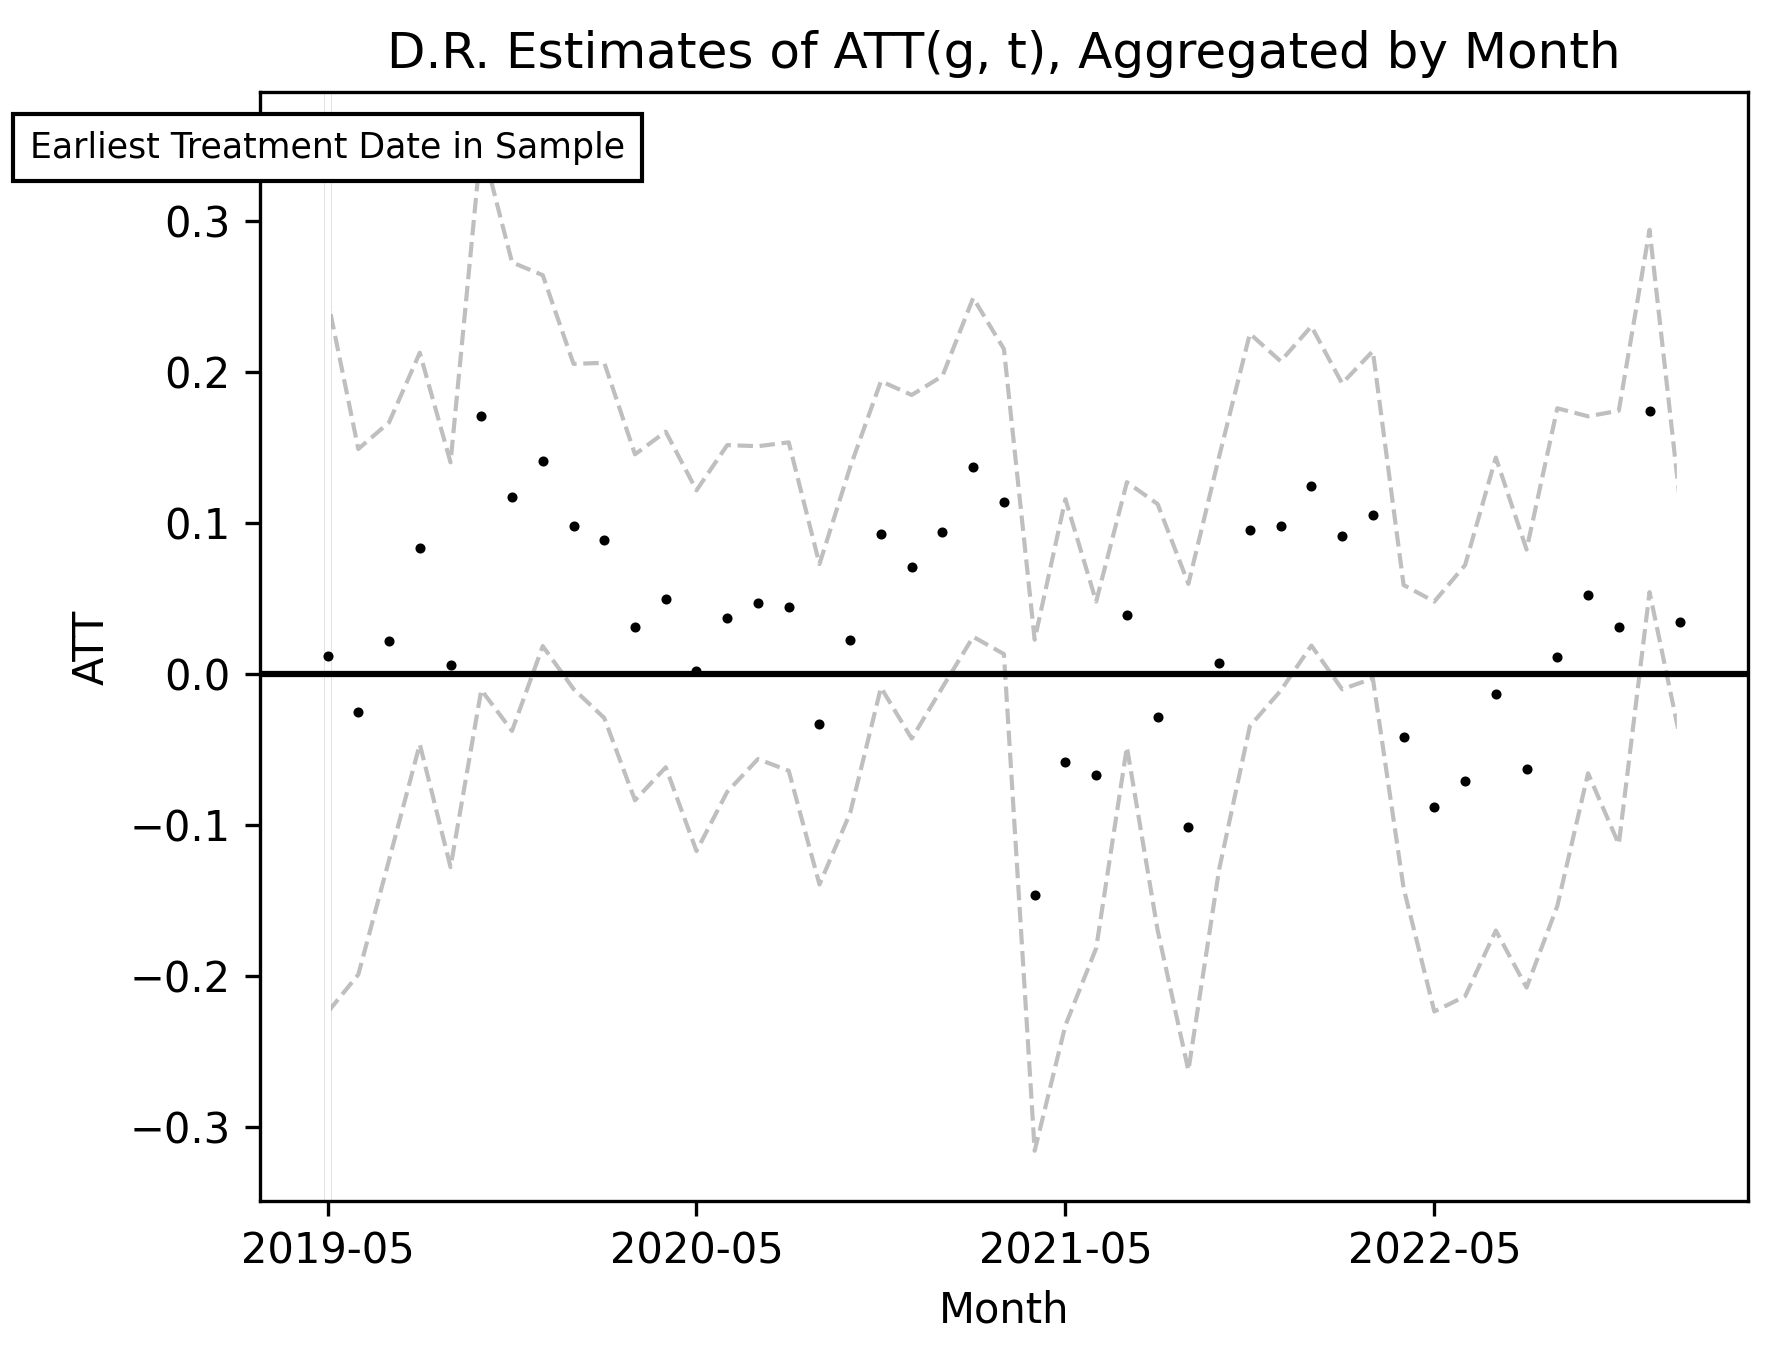

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")